## Setup and Data Loading

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Exploratory Data Analysis (EDA)

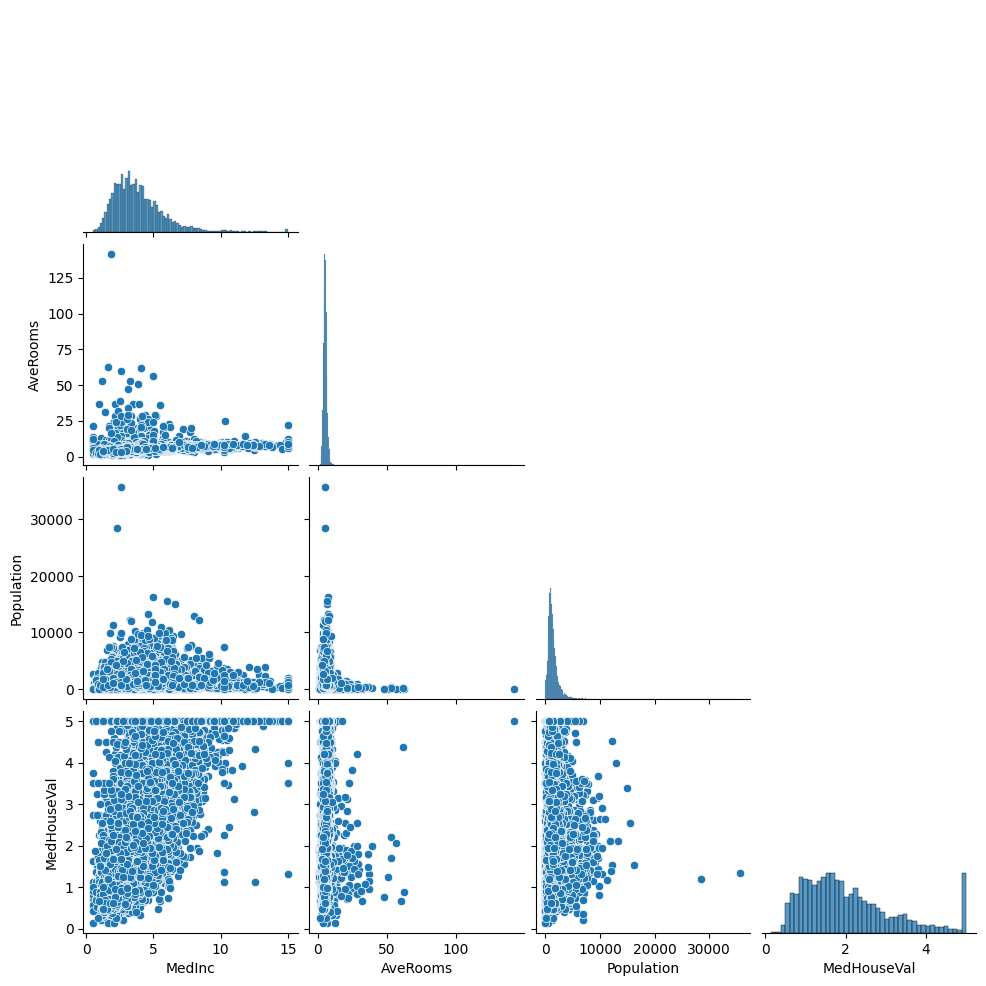

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of a few features vs. target
sns.pairplot(
    pd.concat([X_train[['MedInc', 'AveRooms', 'Population']], y_train.rename('MedHouseVal')], axis=1),
    corner=True
)
plt.show()

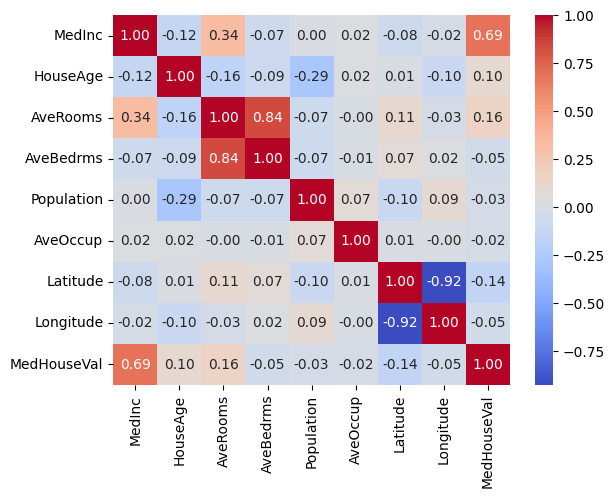

In [3]:
# Correlation heatmap
corr = pd.concat([X_train, y_train.rename('MedHouseVal')], axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## Baseline Model: Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Linear Regression R²: {r2_lr:.4f}")


Linear Regression MSE: 0.5559
Linear Regression R²: 0.5758


## Advanced Model: Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R²: {r2_rf:.4f}")


Random Forest MSE: 0.2963
Random Forest R²: 0.7739


## Model Comparison

In [6]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'R2 Score': [r2_lr, r2_rf]
})
print(results)


               Model       MSE  R2 Score
0  Linear Regression  0.555892  0.575788
1      Random Forest  0.296298  0.773889


## Feature Importance (Random Forest)

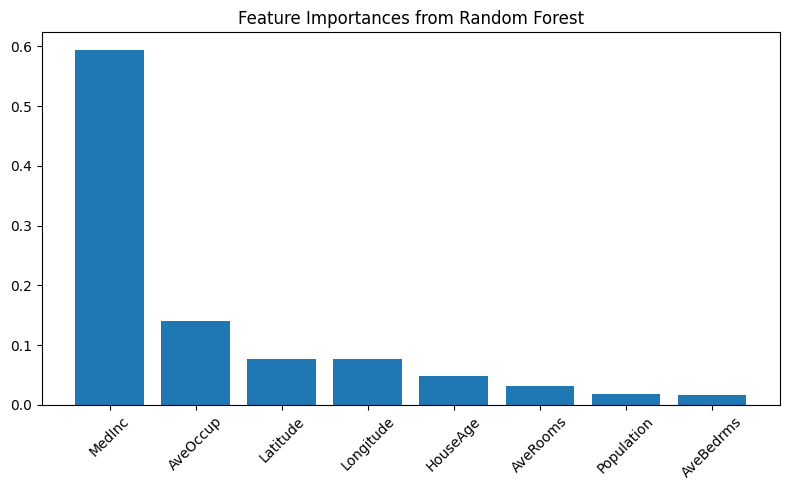

In [7]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feat_names = california.feature_names
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importances from Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feat_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


## 🧾 Results and Conclusion

### 🔍 Model Evaluation

We used **Linear Regression** as a baseline model for predicting California housing prices based on various features such as median income, average rooms, population, etc.

- **Mean Squared Error (MSE)**: The lower the MSE, the better the model fits the data.
- **R² Score (Coefficient of Determination)**: Measures how well the model explains the variability of the target variable.

The results obtained were:
#####               Model       MSE  R2 Score
##### 0  Linear Regression  0.555892  0.575788
##### 1      Random Forest  0.296298  0.773889
##### Forest MSE: 0.2963
##### Forest R²: 0.7739

### 🧠 Conclusion

- The Random Forest model outperforms Linear Regression by a wide margin in both accuracy (lower MSE) and explanatory power (higher R²).
- This shows that **ensemble tree-based models** are more suitable for capturing the non-linear patterns in housing data.
- Further improvements could be achieved using:
  - **Hyperparameter tuning** (e.g., `GridSearchCV`)
  - **Feature selection or engineering**
  - **Other advanced models** like XGBoost, LightGBM, or Neural Networks

📌 **Next Steps**:
- Add cross-validation to ensure model robustness.
- Analyze feature importance to understand drivers of house prices.